# 日経平均株価 月足 メディアン統計

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime
import os

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mplfinance as mpf
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

In [3]:
code = "N225"
symbol = "^%s" % code
yticker = yf.Ticker(symbol)

In [4]:
# 月足で過去全てのデータを取得
df0 = yticker.history(period="max", interval="1mo")
# df0 = df0[:(len(df0) - 1)] # 今月分は除外

# ローソク足のチャートには、そのうち過去 10 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_8y = datetime.timedelta(days=366 * 8.5)
df = df0[dt_last - tdelta_8y <= df0.index]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-07-01 00:00:00+09:00,20056.320312,20200.880859,19856.650391,19925.179688,1790600000,0.0,0.0
2017-08-01 00:00:00+09:00,19907.080078,20113.730469,19280.019531,19646.240234,1876000000,0.0,0.0
2017-09-01 00:00:00+09:00,19733.570312,20481.269531,19239.519531,20356.279297,1807500000,0.0,0.0
2017-10-01 00:00:00+09:00,20400.509766,22086.880859,20363.279297,22011.609375,1872800000,0.0,0.0
2017-11-01 00:00:00+09:00,22144.919922,23382.150391,21972.339844,22724.960938,1981200000,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-01 00:00:00+09:00,42362.710938,45852.750000,41835.171875,44932.628906,2488800000,0.0,0.0
2025-10-01 00:00:00+09:00,44831.949219,52411.339844,44357.648438,52411.339844,3069700000,0.0,0.0
2025-11-01 00:00:00+09:00,52294.308594,52636.871094,48235.300781,50253.910156,2646400000,0.0,0.0


In [5]:
dt = df.tail(1).index[0]
year_str = f"{dt.year:04d}"
month_str = f"{dt.month:02d}"
year_str, month_str

('2026', '01')

## Moving Median

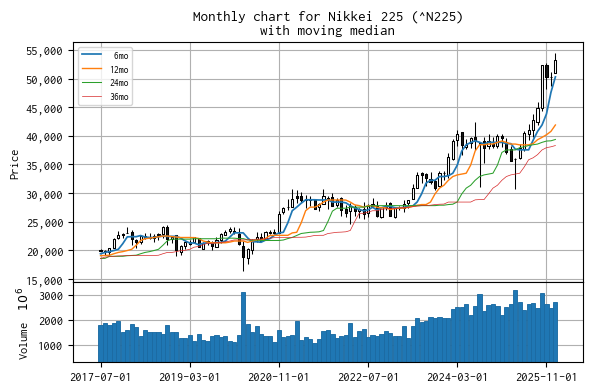

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 9

#fig, ax = plt.subplots(figsize=(6, 4))
fig = plt.figure(figsize=(6, 4))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

mm06 = df0["Close"].rolling(6).median()
mm12 = df0["Close"].rolling(12).median()
mm24 = df0["Close"].rolling(24).median()
mm36 = df0["Close"].rolling(36).median()

apds = [
    mpf.make_addplot(
        mm06[df.index],
        width=1.25,
        linestyle="solid",
        color="C0",
        label=" 6mo",
        ax=ax[0],
    ),
    mpf.make_addplot(
        mm12[df.index],
        width=1,
        linestyle="solid",
        color="C1",
        label="12mo",
        ax=ax[0],
    ),
    mpf.make_addplot(
        mm24[df.index],
        width=0.75,
        linestyle="solid",
        color="C2",
        label="24mo",
        ax=ax[0],
    ),
    mpf.make_addplot(
        mm36[df.index],
        width=0.5,
        linestyle="solid",
        color="C3",
        label="36mo",
        ax=ax[0],
    ),
]

mpf.plot(
    df,
    type="candle",
    style="default",
    volume=ax[1],
    datetime_format="%Y-%m-%d",
    addplot=apds,
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax[0],
)
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[0].set_title(
    f"Monthly chart for {yticker.info["longName"]} ({symbol})" f"\nwith moving median"
)
ax[0].legend(loc="upper left", fontsize=7)
#ax.grid()

plt.tight_layout()
plt.savefig(os.path.join(f"{year_str}", f"{month_str}_report_monthly_chart_median_{code}.png"))
plt.show()

In [7]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-12-01 00:00:00+09:00,50318.589844,51127.691406,48643.781250,50339.480469,2469200000,0.0,0.0
2026-01-01 00:00:00+09:00,51010.281250,54487.320312,50995.671875,53322.851562,2711800000,0.0,0.0


In [8]:
df.tail(2)["Close"]

Date
2025-12-01 00:00:00+09:00    50339.480469
2026-01-01 00:00:00+09:00    53322.851562
Name: Close, dtype: float64

In [9]:
df.tail(2)["Close"].diff()

Date
2025-12-01 00:00:00+09:00            NaN
2026-01-01 00:00:00+09:00    2983.371094
Name: Close, dtype: float64

In [10]:
df["Close"].rolling(6).median().tail(10)

Date
2025-04-01 00:00:00+09:00    37681.765625
2025-05-01 00:00:00+09:00    37560.300781
2025-06-01 00:00:00+09:00    37560.300781
2025-07-01 00:00:00+09:00    37560.300781
2025-08-01 00:00:00+09:00    39226.246094
2025-09-01 00:00:00+09:00    40778.605469
2025-10-01 00:00:00+09:00    41894.144531
2025-11-01 00:00:00+09:00    43825.548828
2025-12-01 00:00:00+09:00    47593.269531
2026-01-01 00:00:00+09:00    50296.695312
Name: Close, dtype: float64

In [11]:
df["Close"].rolling(12).median().tail(10)

Date
2025-04-01 00:00:00+09:00    38567.824219
2025-05-01 00:00:00+09:00    38427.890625
2025-06-01 00:00:00+09:00    38427.890625
2025-07-01 00:00:00+09:00    38427.890625
2025-08-01 00:00:00+09:00    38644.640625
2025-09-01 00:00:00+09:00    39326.869141
2025-10-01 00:00:00+09:00    39733.513672
2025-11-01 00:00:00+09:00    40190.964844
2025-12-01 00:00:00+09:00    40778.605469
2026-01-01 00:00:00+09:00    41894.144531
Name: Close, dtype: float64

In [12]:
df["Close"].rolling(24).median().tail(10)

Date
2025-04-01 00:00:00+09:00    37537.525391
2025-05-01 00:00:00+09:00    37942.326172
2025-06-01 00:00:00+09:00    38086.566406
2025-07-01 00:00:00+09:00    38306.845703
2025-08-01 00:00:00+09:00    38446.779297
2025-09-01 00:00:00+09:00    38567.824219
2025-10-01 00:00:00+09:00    38864.500000
2025-11-01 00:00:00+09:00    39091.535156
2025-12-01 00:00:00+09:00    39134.005859
2026-01-01 00:00:00+09:00    39369.339844
Name: Close, dtype: float64

In [13]:
df["Close"].rolling(36).median().tail(10)

Date
2025-04-01 00:00:00+09:00    33326.605469
2025-05-01 00:00:00+09:00    33475.531250
2025-06-01 00:00:00+09:00    34552.224609
2025-07-01 00:00:00+09:00    35831.468750
2025-08-01 00:00:00+09:00    36166.044922
2025-09-01 00:00:00+09:00    36721.105469
2025-10-01 00:00:00+09:00    37537.525391
2025-11-01 00:00:00+09:00    37942.326172
2025-12-01 00:00:00+09:00    38086.566406
2026-01-01 00:00:00+09:00    38306.845703
Name: Close, dtype: float64

## Robust Bollinger bands

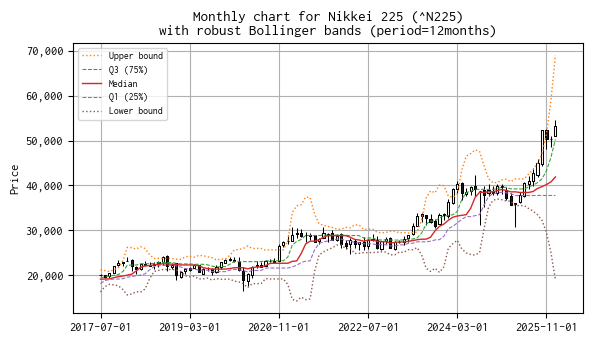

In [14]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 9

fig, ax = plt.subplots(figsize=(6, 3.5))

# Bollinger bands
period = 12
mv_median = df0["Close"].rolling(period).median()
mv_q1 = df0["Close"].rolling(period).quantile(0.25)
mv_q3 = df0["Close"].rolling(period).quantile(0.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds = [
    mpf.make_addplot(
        mv_upper[df.index],
        width=1,
        color="C1",
        linestyle="dotted",
        label="Upper bound",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_q3[df.index],
        width=0.75,
        color="C2",
        linestyle="dashed",
        label="Q3 (75%)",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_median[df.index],
        width=1,
        color="C3",
        linestyle="solid",
        label="Median",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_q1[df.index],
        width=0.75,
        color="C4",
        linestyle="dashed",
        label="Q1 (25%)",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_lower[df.index],
        width=1,
        color="C5",
        linestyle="dotted",
        label="Lower bound",
        ax=ax,
    ),
]

mpf.plot(
    df,
    type="candle",
    style="default",
    addplot=apds,
    datetime_format="%Y-%m-%d",
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.grid()
ax.legend(loc="best", fontsize=7)

try:
    ax.set_title(
        f"Monthly chart for {yticker.info["longName"]} ({symbol})"
        f"\nwith robust Bollinger bands (period={period}months)"
    )
except KeyError:
    ax.set_title(
        f"Monthly chart for {symbol}"
        f"\nwith robust Bollinger bands (period={period}months)"
    )

plt.tight_layout()
plt.savefig(os.path.join(f"{year_str}", f"{month_str}_report_monthly_chart_bollinger_robust_{code}.png"))
plt.show()

## ヒストグラムと Q-Q プロット

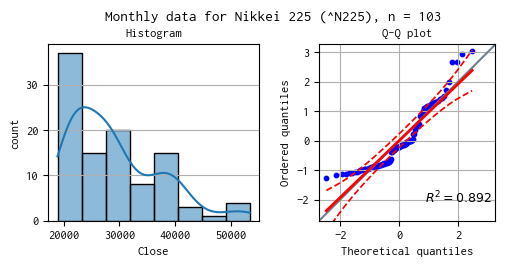

In [15]:
plt.rcParams["font.size"] = 9
fig, axes = plt.subplots(1, 2, figsize=(6, 2.5))

sns.histplot(df["Close"], kde=True, ax=axes[0])

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis="y")
axes[0].set_title("Histogram", fontsize=9)

# Q-Q プロット
pg.qqplot(df["Close"], s=10, ax=axes[1])
axes[1].set_title("Q-Q plot", fontsize=9)
axes[1].grid()

plt.suptitle(
    f"Monthly data for {yticker.info["longName"]} ({symbol}), n = {len(df)}",
    fontsize=11,
)
#plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(top=0.84, bottom=0.135, wspace=0.2)
plt.savefig(os.path.join(f"{year_str}",  f"{month_str}_report_monthly_histogram_qqplot_{code}.png"))
plt.show()